# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.



# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---



### 1.Import libraries

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [31]:
df = pd.read_csv("store_sharing.csv")
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.shape

(17414, 10)

### 3.Checking missing values and if there are any dublicate rows or not.

In [13]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [6]:
df.drop_duplicates().shape

(17414, 10)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(17414, 10)

In [9]:
df.isna().sum()  # isna() numpy kütüphanesindeki null değerleri çıkarıyor.

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [10]:
df.isnull().sum()  # isnull() are not considered NA values.

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plotting the distribution of various discrete features on (Season, haliday, weekend and weathercode)

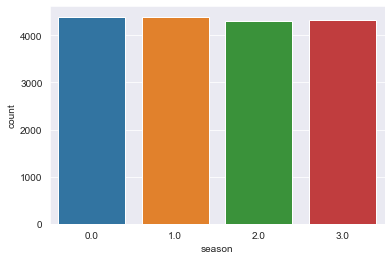

In [11]:
sns.countplot(data = df, x = "season");

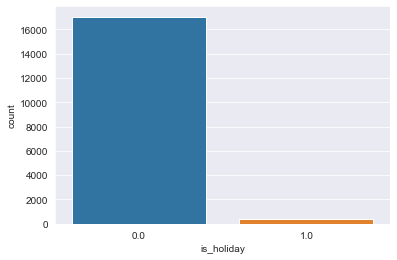

In [12]:
# is_holiday
sns.countplot(data = df, x = "is_holiday");

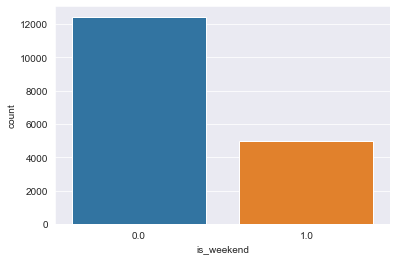

In [14]:
sns.countplot(data = df, x = "is_weekend");

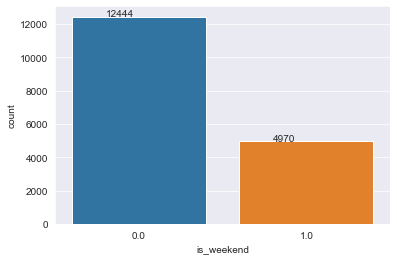

In [19]:
ax = sns.countplot("is_weekend", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

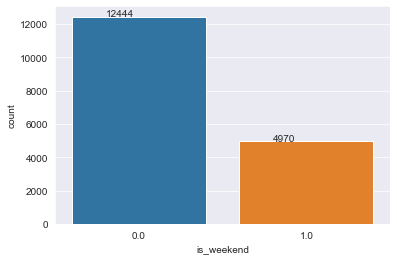

In [21]:
# weather_code
ax = sns.countplot("is_weekend", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

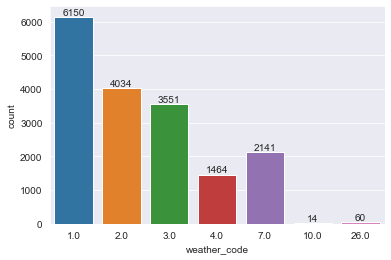

In [23]:
# weather_code
sns.countplot(data = df, x = "weather_code");
for index, value in enumerate(df.weather_code.value_counts().sort_index()):
    plt.text(index, value, str(value), ha="center", va="bottom")

### 5.Looking at the data type of each variable, transform `timestamp` in type, and set it as index.

In [24]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [32]:
df.timestamp = pd.to_datetime(df.timestamp)

In [33]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

In [34]:
df.set_index("timestamp", inplace=True)
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.feature engineering. Extracting new columns (day of the week, day of the month, hour, month, season, year etc.)

In [35]:
df["year_month"] = df.index.strftime("%Y-%m")

In [36]:
df["year"] = df.index.strftime("%Y").astype("int64")  # df["year"] = df.index.year

In [37]:
df["month"] = df.index.strftime("%m").astype("int64")  # df["month"] = df.index.month

In [38]:
df["day_of_month"] = df.index.strftime("%d").astype("int64") # df["day_of_month"] = df.index.day

In [39]:
df["day_of_week"] = df.index.weekday.astype("int64")

In [40]:
df["hour"] = df.index.strftime("%H").astype("int64")  # df["hour"] = df.index.hour

In [41]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualizing the correlation with a heatmap

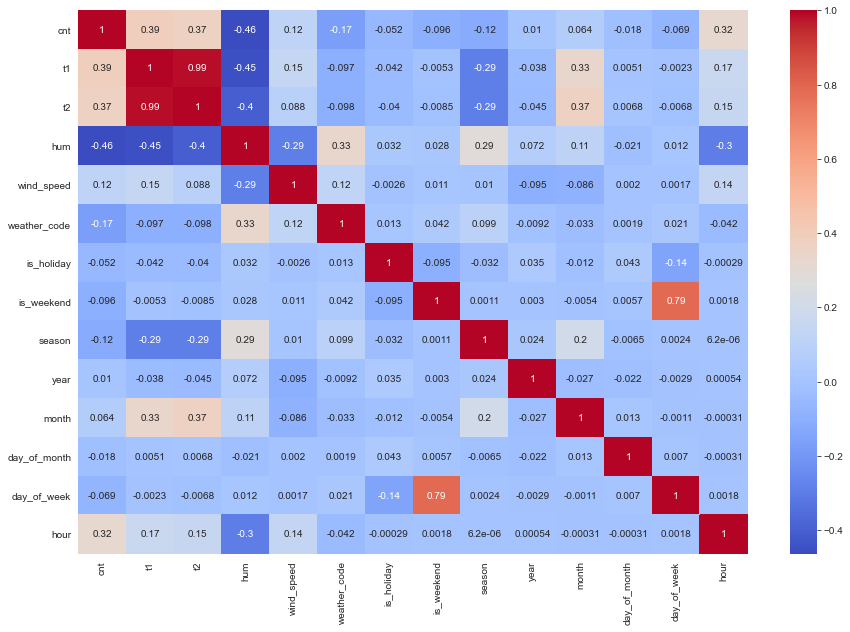

In [43]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap= "coolwarm");

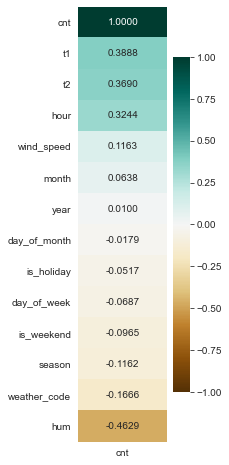

In [54]:
# for the target variable
plt.figure(figsize=(2,8));
x = df.corr().loc[:,['cnt']].sort_values(by="cnt", ascending=False)
sns.heatmap(data = x, annot=True, vmin=-1, vmax=1, cmap="BrBG", fmt= ".4f");

### 8. Visualizing the correlation of the target variable and the other features with barplot

In [55]:
df.corr().cnt.sort_values(ascending=False).index

Index(['cnt', 't1', 't2', 'hour', 'wind_speed', 'month', 'year',
       'day_of_month', 'is_holiday', 'day_of_week', 'is_weekend', 'season',
       'weather_code', 'hum'],
      dtype='object')

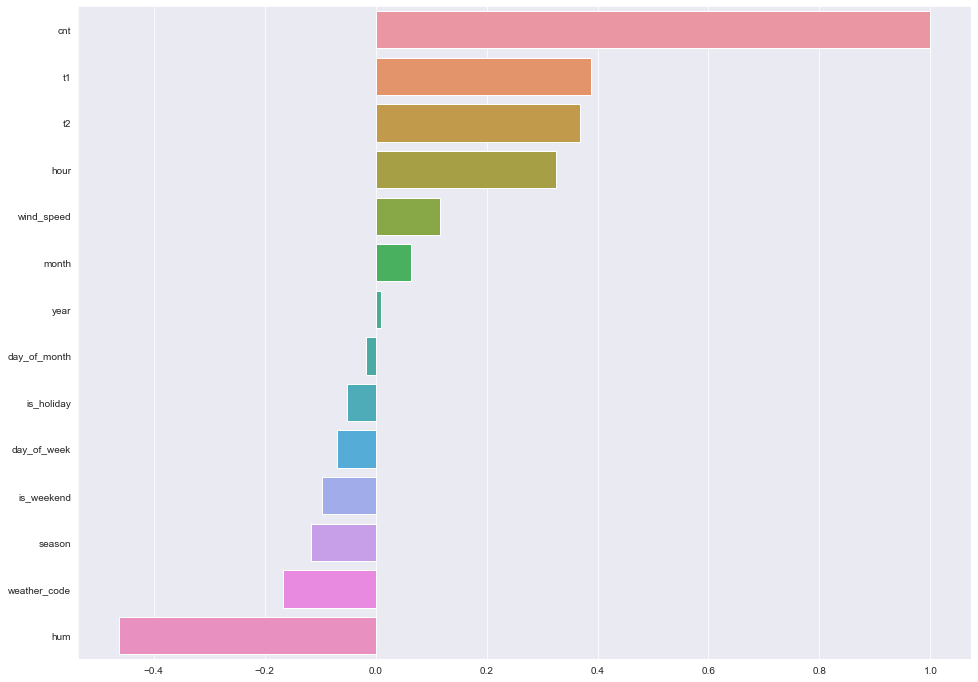

In [29]:
#with seaborn
plt.figure(figsize=(16,12))
sns.barplot(x = df.corr().cnt.sort_values(ascending=False).values, y=df.corr().cnt.sort_values(ascending=False).index);

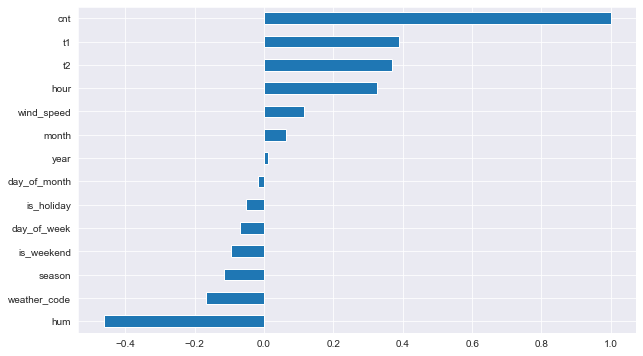

In [30]:
#with pandas

plt.figure(figsize=(10,6))
df.corr().cnt.sort_values().plot.barh()
plt.show()

### 9.Plotting bike shares over time use lineplot

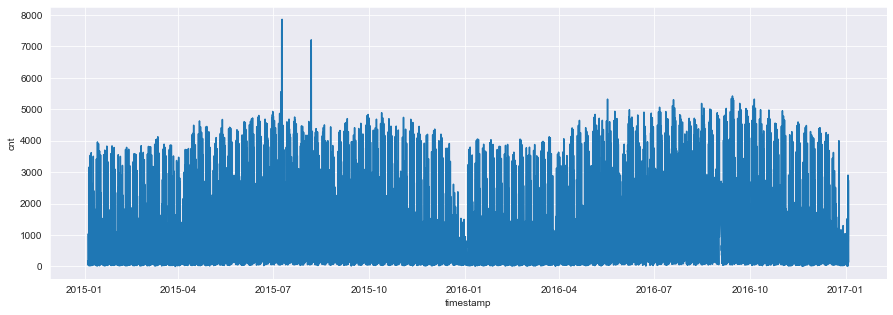

In [31]:
plt.figure(figsize=(15,5))
sns.lineplot(data = df, x = df.index, y= df.cnt);

### 10.Plotting bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [32]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


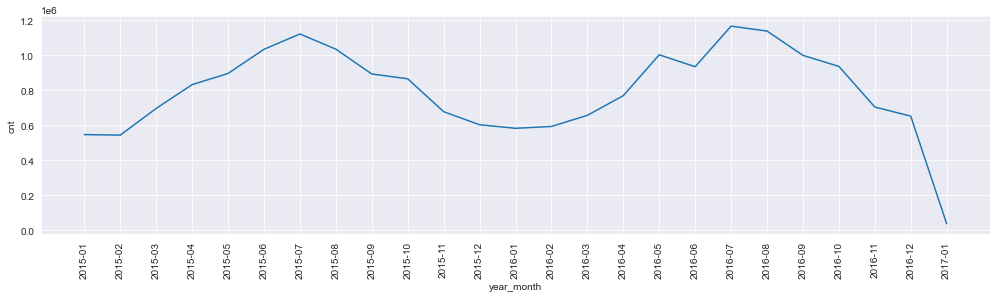

In [56]:
# with lineplot 
plt.figure(figsize=(17,4))
sns.lineplot(data = df, x = "year_month", y = "cnt", ci = None, estimator = sum)
plt.xticks(rotation = 90)
plt.show()

In [65]:
df_sum = pd.DataFrame(df.groupby("year_month").cnt.sum())
df_sum

,cnt
year_month,
2015-01,0.546639
2015-02,0.543594
2015-03,0.695934
2015-04,0.831582
2015-05,0.895413
2015-06,1.033252
2015-07,1.120687
2015-08,1.033951
2015-09,0.892478


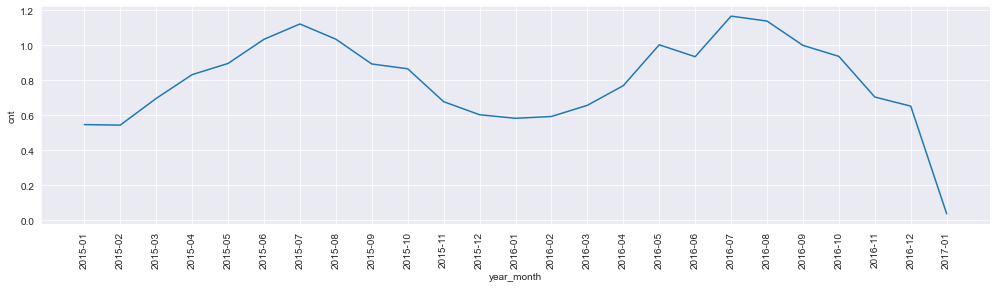

In [66]:
# with lineplot
plt.figure(figsize=(17,4))
sns.lineplot(data = df_sum/10**6, x = "year_month", y = "cnt", ci = None)
plt.xticks(rotation = 90)
plt.show()

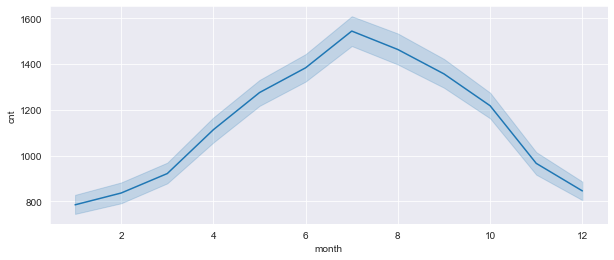

In [35]:
# with lineplot
plt.figure(figsize=(10,4))
sns.lineplot(data = df, x = 'month', y = 'cnt');

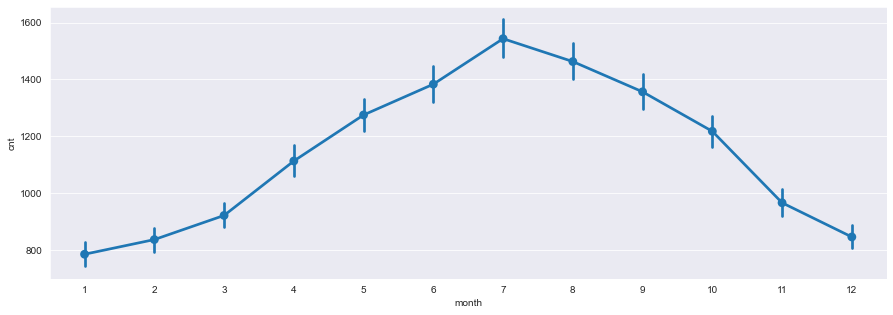

In [36]:
# with pointplot
plt.figure(figsize=(15,5))
sns.pointplot(data=df,x="month",y="cnt")
plt.show()

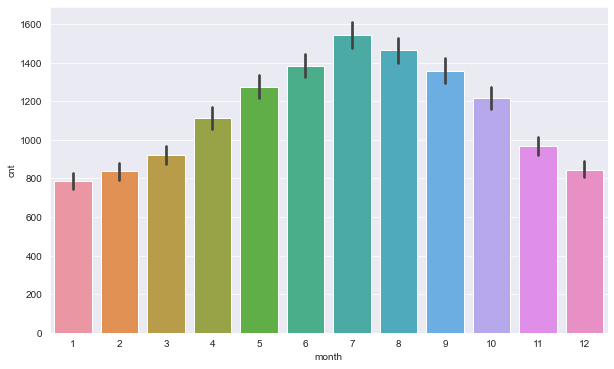

In [38]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="month",y="cnt")
plt.show()

### 11.Plotting bike shares by hours on (holidays, weekend, season)

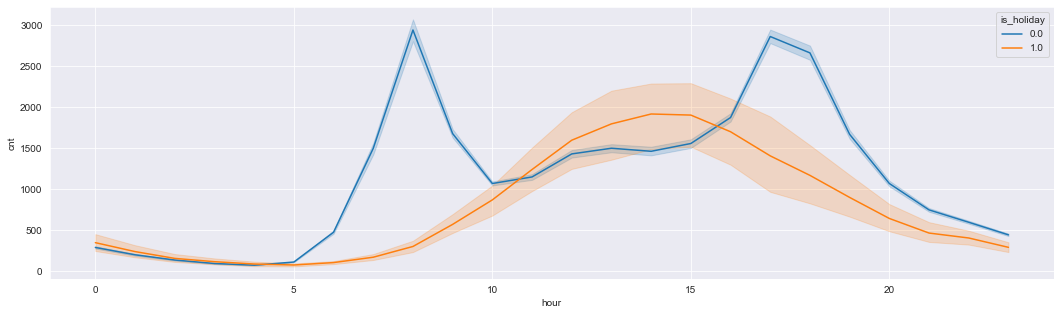

In [39]:
# with lineplot (*whether it is a holiday or not*)
plt.figure(figsize=(18,5))
sns.lineplot(data = df, x = "hour", y = "cnt", hue = "is_holiday")
plt.show()

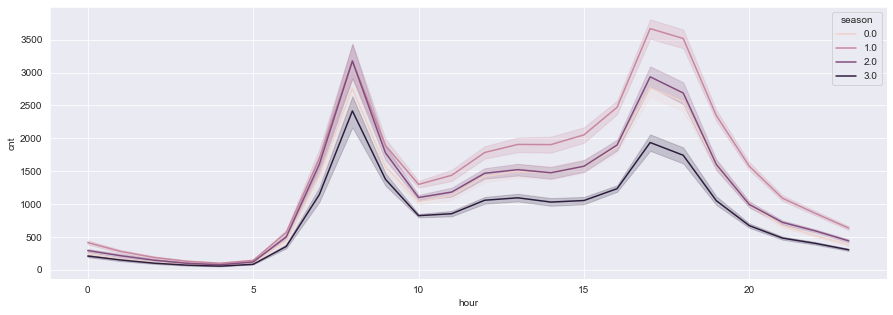

In [40]:
# with lineplot (*to see seasonal breakdowns*)
plt.figure(figsize=(15,5))
sns.lineplot(data = df, x = "hour", y = "cnt", hue = "season")
plt.show()

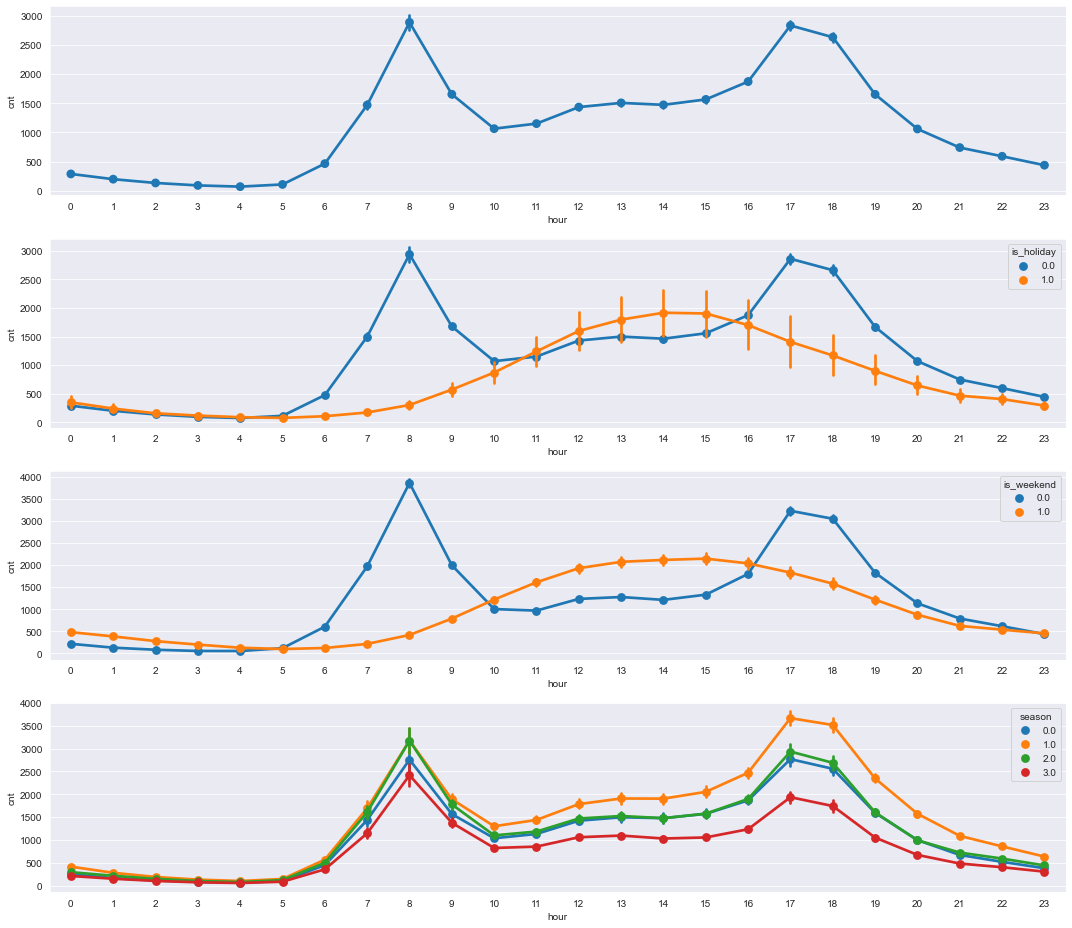

In [41]:
# with pointplot
fig, ax= plt.subplots(4,1, figsize=(15,13))
sns.pointplot(data=df, x="hour", y="cnt", ax=ax[0])
sns.pointplot(data=df, x="hour", y="cnt",hue="is_holiday",ax=ax[1])
sns.pointplot(data=df, x="hour", y="cnt",hue="is_weekend",ax=ax[2])
sns.pointplot(data=df, x="hour", y="cnt",hue="season",ax=ax[3])
plt.tight_layout()

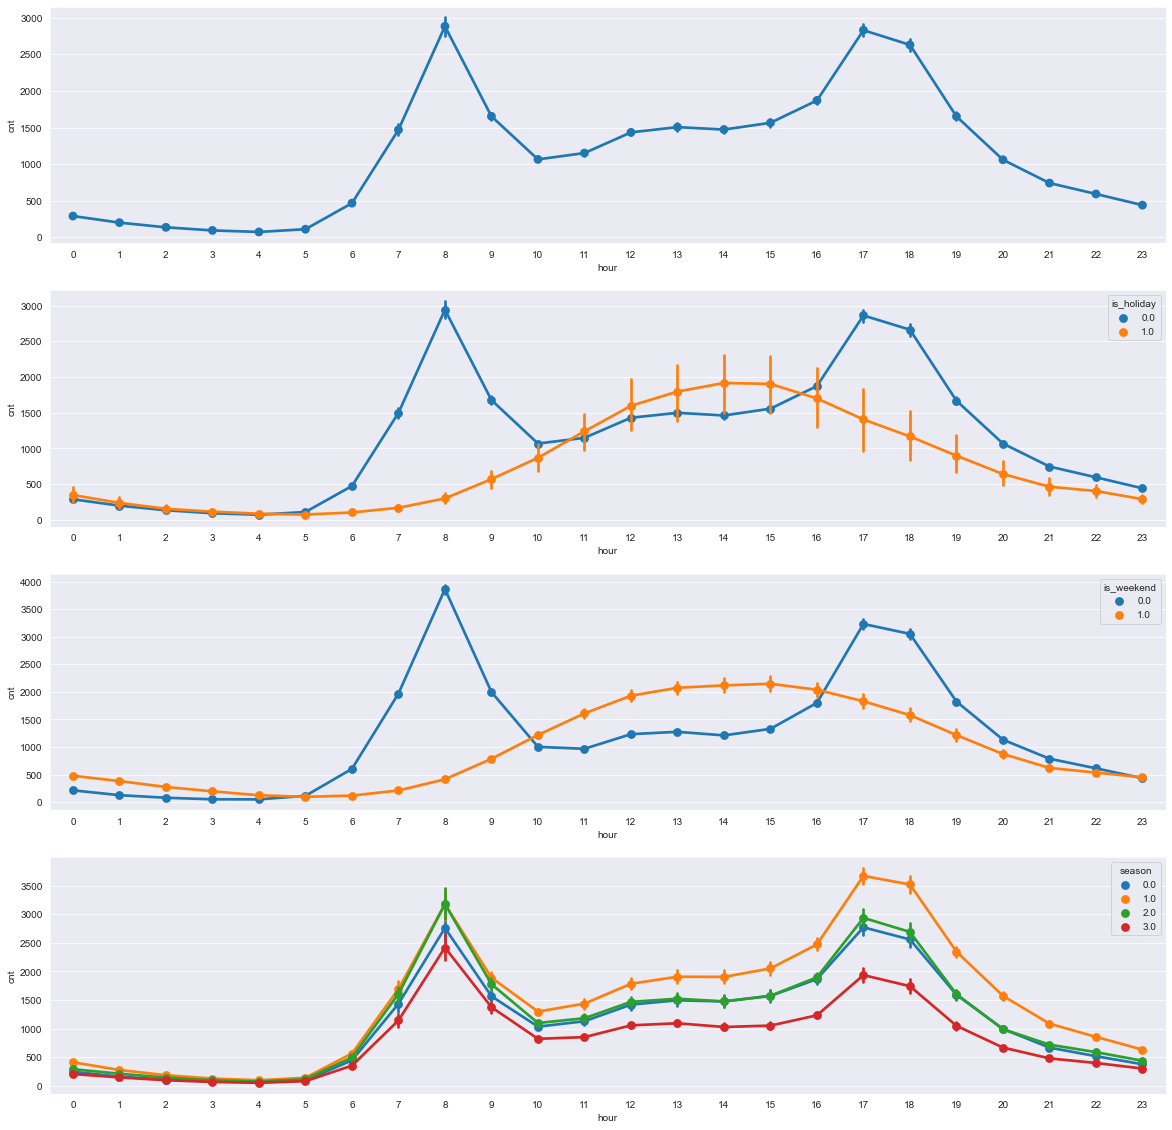

In [67]:
# with pointplot
plt.figure(figsize=(20,20))

plt.subplot(4,1,1)
sns.pointplot(df.hour, df.cnt);

plt.subplot(4,1,2)
sns.pointplot(df.hour, df.cnt, hue = df.is_holiday);

plt.subplot(4,1,3)
sns.pointplot(df.hour, df.cnt, hue = df.is_weekend);

plt.subplot(4,1,4)
sns.pointplot(df.hour, df.cnt, hue = df.season);

### 12.Plotting bike shares by day of week
- to see whether it is a holiday or not

In [35]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017-01,2017,1,3,0,19
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,0,20
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017-01,2017,1,3,0,21


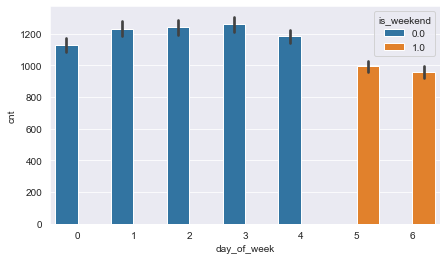

In [42]:
# with barplot
plt.figure(figsize=(7,4))
sns.barplot(data = df, x = "day_of_week", y = "cnt", hue = "is_weekend");

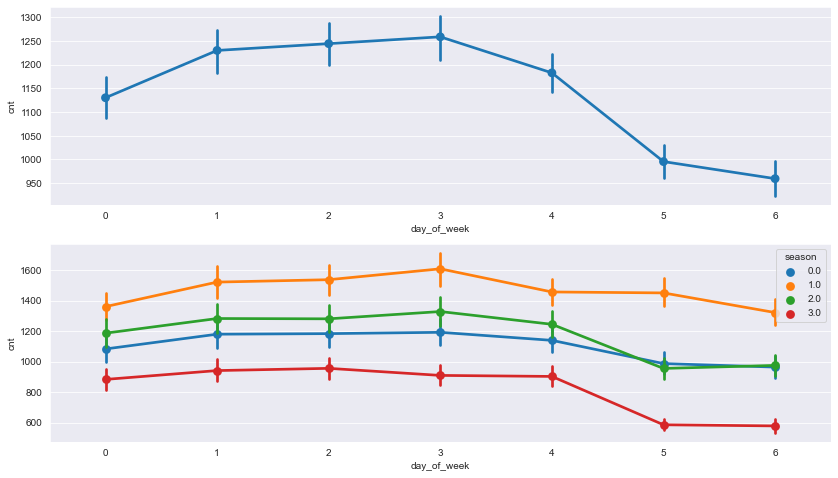

In [43]:
# with pointplot
fig , ax = plt.subplots(2,1, figsize =(14,8))
sns.pointplot(data=df,x="day_of_week", y="cnt", ax = ax[0])
sns.pointplot(data=df,x="day_of_week", y="cnt", hue = "season", ax = ax[1]);

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

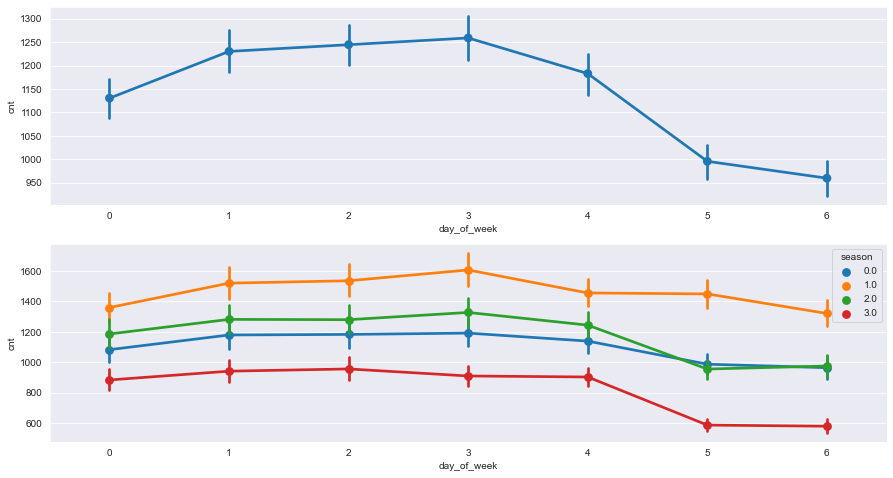

In [68]:
# with pointplot
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
sns.pointplot(df.day_of_week,df.cnt)
plt.subplot(2,1,2)
sns.pointplot(df.day_of_week,df.cnt, hue = df.season)

### 13.Plotting bike shares by day of month

In [44]:
df.groupby("day_of_month")[["cnt"]].mean().T.astype("int")

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


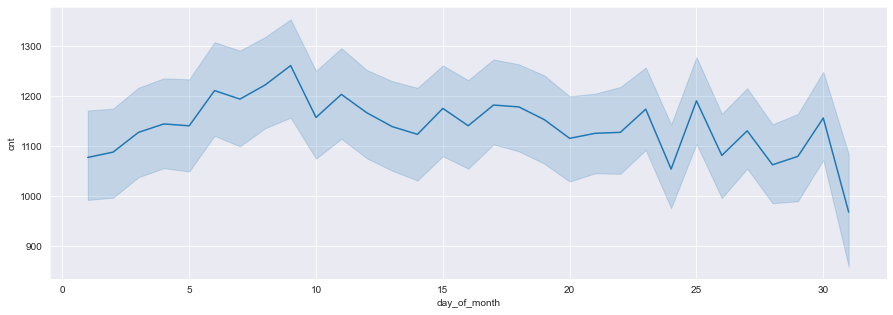

In [45]:
#with lineplot
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x = "day_of_month", y = "cnt");

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


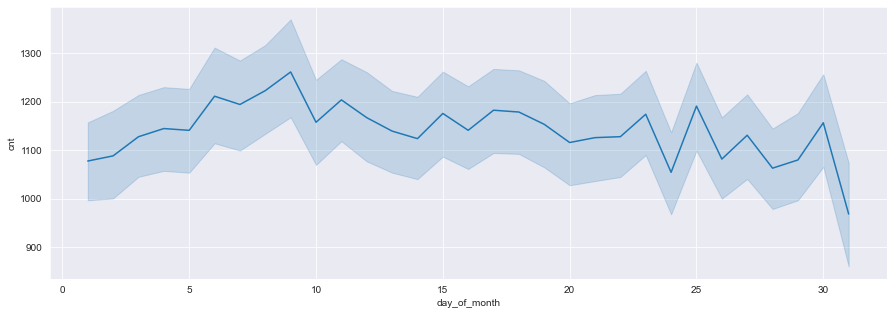

In [69]:
#with lineplot
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x="day_of_month", y="cnt")
pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int")).T


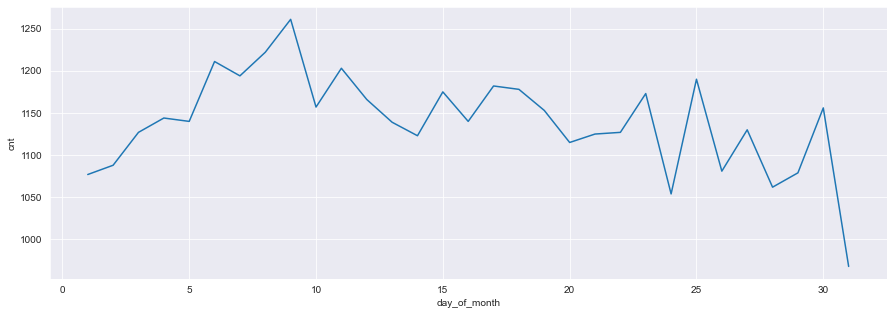

In [71]:
#with lineplot
df_cnt =pd.DataFrame(df.groupby("day_of_month").cnt.mean().astype("int"))
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_cnt, x="day_of_month", y="cnt");

### 14.Plotting bike shares by year
### Plotting bike shares on holidays by seasons

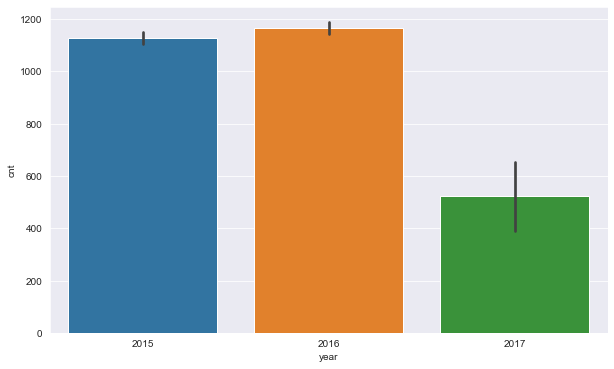

In [46]:
# with barplot
plt.figure(figsize=(10,6))
sns.barplot(data=df, x = "year", y = "cnt");

### 15.Visualizing the distribution of bike shares by weekday/weekend with piechart and barplot

In [63]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [240]:
df[["is_weekend"]]

,is_weekend
timestamp,
2015-01-04 00:00:00,1.0
2015-01-04 01:00:00,1.0
2015-01-04 02:00:00,1.0
2015-01-04 03:00:00,1.0
2015-01-04 04:00:00,1.0
...,...
2017-01-03 19:00:00,0.0
2017-01-03 20:00:00,0.0
2017-01-03 21:00:00,0.0


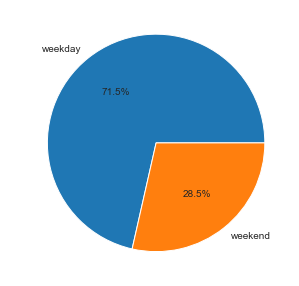

In [80]:
# pie chart
plt.figure(figsize=(5,5))

labels = ['weekday', 'weekend']
df.is_weekend.value_counts().plot.pie(autopct="%.1f%%", labels=labels);
plt.ylabel(" ");

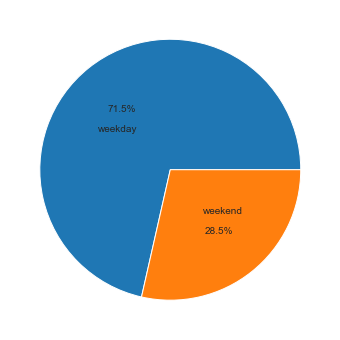

In [72]:
# pie chart
fig, ax = plt.subplots(figsize=(6,6))
ax.pie(df.is_weekend.value_counts(), labels=["weekday","weekend"], labeldistance=0.4, autopct="%.1f%%");

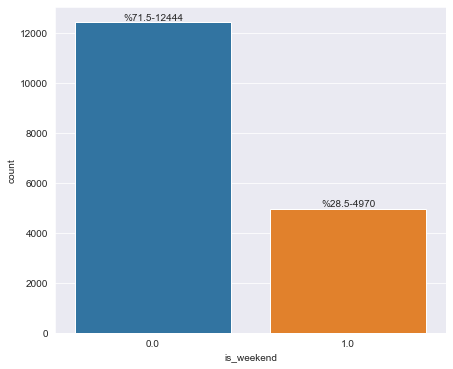

In [132]:
bölüm = df.is_weekend.value_counts().sum()/100
plt.figure(figsize=(7,6))
sns.countplot(data = df, x = "is_weekend");
for index,value in enumerate(df.is_weekend.value_counts()):
    plt.text(index, value, f"%{value/bölüm:.3}-{value}", ha="center", va="bottom")

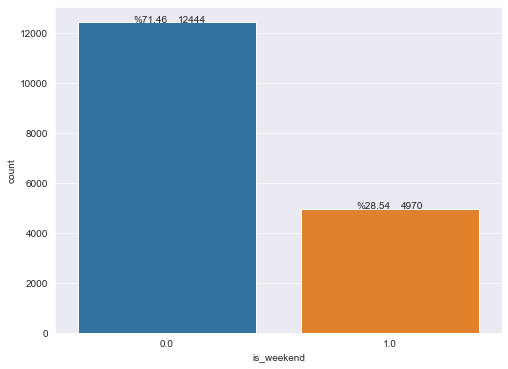

In [76]:
# with countplot (other1)
ig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=df,x="is_weekend",ax=ax)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.45, p.get_height()+1))
    ax.annotate("%"+str(round((p.get_height()/(df.is_weekend.count()))*100,2)), (p.get_x()+0.25, p.get_height()-5));

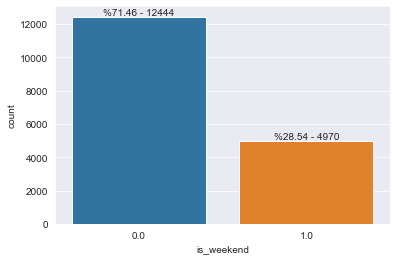

In [77]:
# with countplot (other2)
percentage = [round(i,2) for i in list(df.is_weekend.value_counts(normalize=True).values*100)]
sns.countplot(df.is_weekend);
for index, value in enumerate(df.is_weekend.value_counts().values):
    plt.text(index, value, f"%{percentage[index]} - {value}",ha = 'center', va = 'bottom')

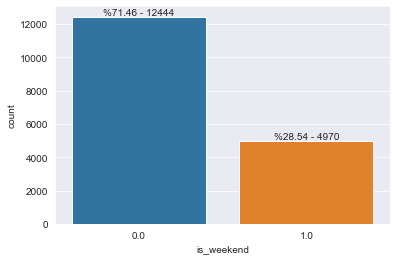

In [86]:
# with countplot (other3)
yüzde = df.is_weekend.value_counts(normalize=True).values*100
sns.countplot(df.is_weekend);
for index, value in enumerate(df.is_weekend.value_counts().values):
    plt.text(index, value, f"%{yüzde[index]:.2f} - {value}",ha = 'center', va = 'bottom')

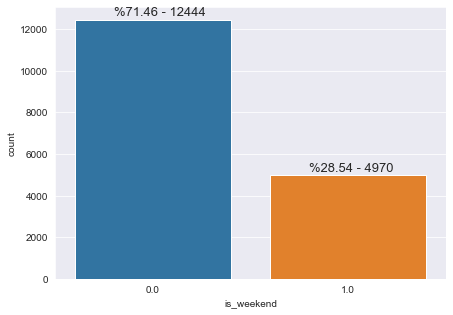

In [84]:
# with countplot (other4)
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x = "is_weekend", data = df)
for p in ax.patches:
    ax.annotate('%' + str(round((p.get_height()) / df.is_weekend.value_counts().sum() * 100, 2)) + " " + "-" + " " +
                str(p.get_height()), (p.get_x()+0.20, p.get_height()+200), fontsize = 13)
plt.show()

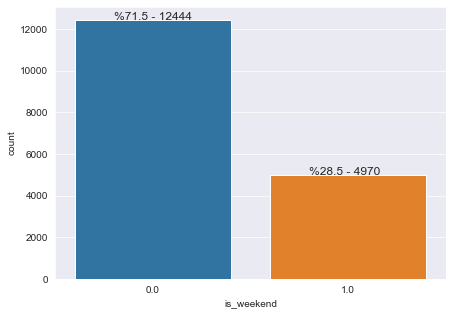

In [85]:
# with countplot ( other5)
fig, ax = plt.subplots(figsize=(7,5))
ax = sns.countplot(x='is_weekend',data=df)
for bar in ax.patches: 
        ax.annotate(  "%"+str(round(100*bar.get_height()/len(df),1)) +' - '+ str(bar.get_height() ), 
                    (bar.get_x()+0.2 , bar.get_height()+10) ,
                    size=12)

### 16.Plotting the distribution of weather code by seasons

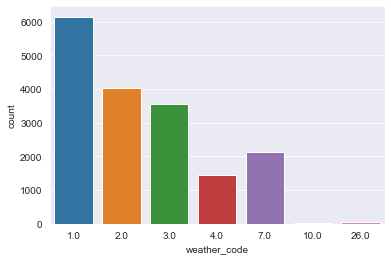

In [134]:
# with countplot
sns.countplot(data = df, x = "weather_code");

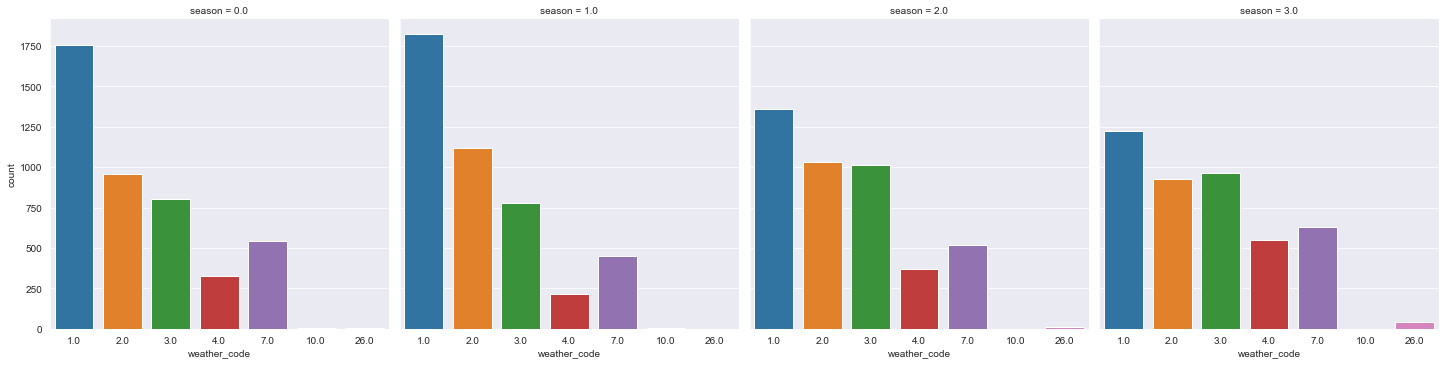

In [136]:
# with catplot
sns.catplot(kind = "count", data = df, x = "weather_code", col = "season");

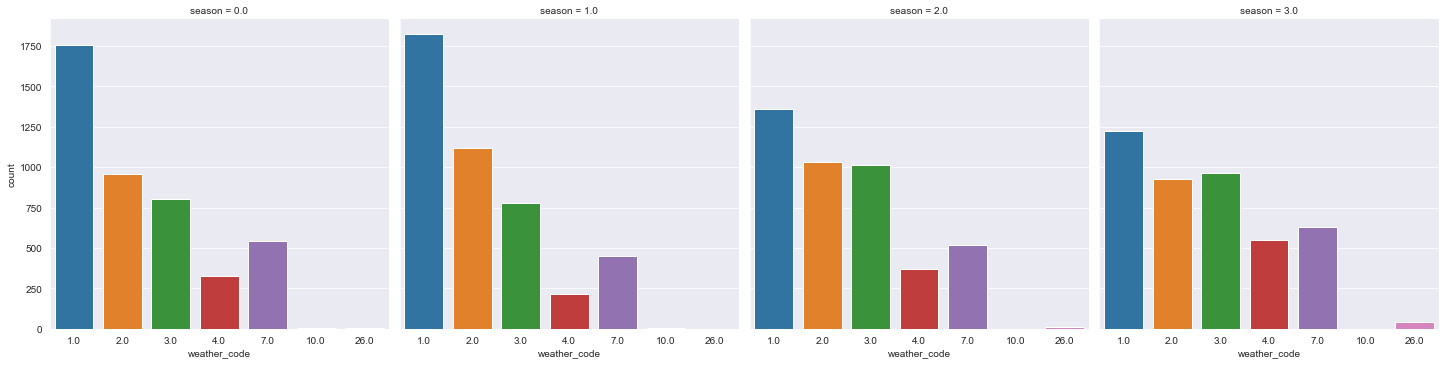

In [139]:
# with catplot
sns.catplot(x = "weather_code", col = "season", col_wrap = 4, data = df, kind="count");

### 17.all the continuous variables with histogram and scatterplot

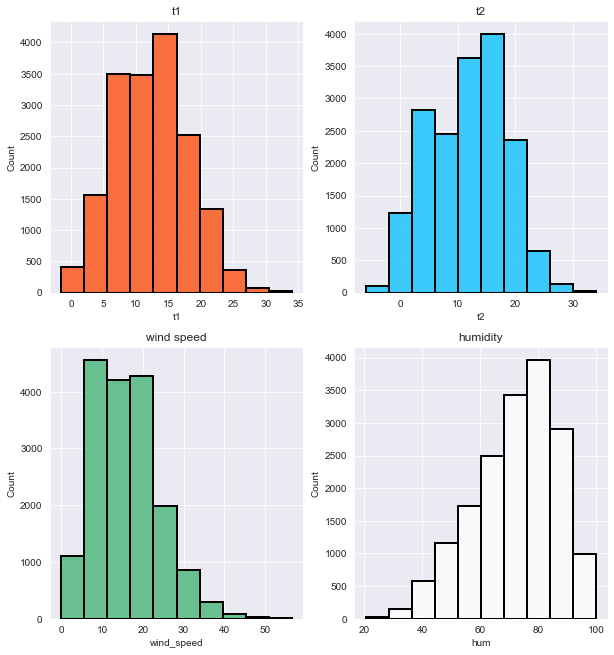

In [174]:
# sns hist
fig , ax = plt.subplots(2,2,figsize=(10,11))
sns.histplot(data=df, x="t1", bins=10, color="orangered", edgecolor = "black", lw = 2, ax=ax[0,0]).set_title("t1")
sns.histplot(data=df, x="t2", bins=10, color="deepskyblue", edgecolor = "black", lw = 2, ax=ax[0,1]).set_title("t2")
sns.histplot(data=df, x="wind_speed", bins=10, color="mediumseagreen", edgecolor = "black", lw = 2, ax=ax[1,0]).set_title("wind speed")
sns.histplot(data=df, x="hum", bins=10, color="white", edgecolor = "black", lw = 2, ax=ax[1,1]).set_title("humidity")
plt.show()

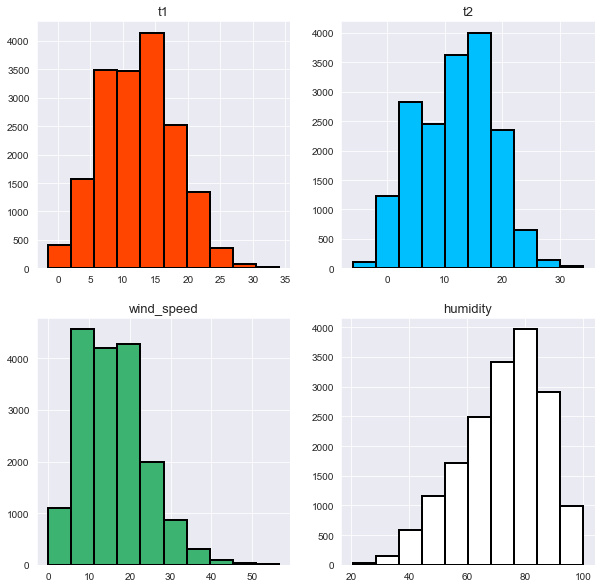

In [169]:
# matplotlib hist (1)
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))

axes[0][0].hist(df["t1"], bins = 10, color = "orangered", edgecolor = "black", linewidth = 2)
axes[0][1].hist(df["t2"], bins = 10, color = "deepskyblue", edgecolor = "black", linewidth = 2)
axes[1][0].hist(df["wind_speed"], bins = 10, color = "mediumseagreen", edgecolor = "black", linewidth = 2)
axes[1][1].hist(df["hum"], bins = 10, color = "White", edgecolor = "black", linewidth = 2)

axes[0][0].set_title("t1", fontsize = 13)
axes[0][1].set_title("t2", fontsize = 13)
axes[1][0].set_title("wind_speed", fontsize = 13)
axes[1][1].set_title("humidity", fontsize = 13)

plt.show()

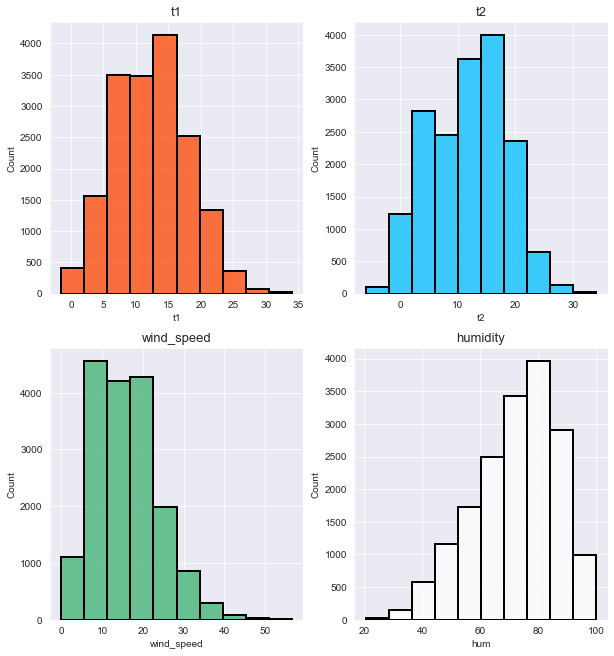

In [87]:
# sns hist (2)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,11))
sns.histplot(data=df, x ="t1", ax = ax[0][0], bins = 10, stat = "count", color = "orangered", edgecolor = "black", linewidth = 2).set_title("t1", fontsize = 13)
sns.histplot(data=df, x ="t2", ax = ax[0][1], bins = 10, stat = "count", color = "deepskyblue", edgecolor = "black", linewidth = 2).set_title("t2", fontsize = 13)
sns.histplot(data=df, x ="wind_speed", ax = ax[1][0], bins = 10, stat = "count", color = "mediumseagreen", edgecolor = "black", linewidth = 2).set_title("wind_speed", fontsize = 13)
sns.histplot(data=df, x ="hum", ax = ax[1][1], bins = 10, stat = "count",  color = "white", edgecolor = "black", linewidth = 2).set_title("humidity", fontsize = 13)
plt.show()

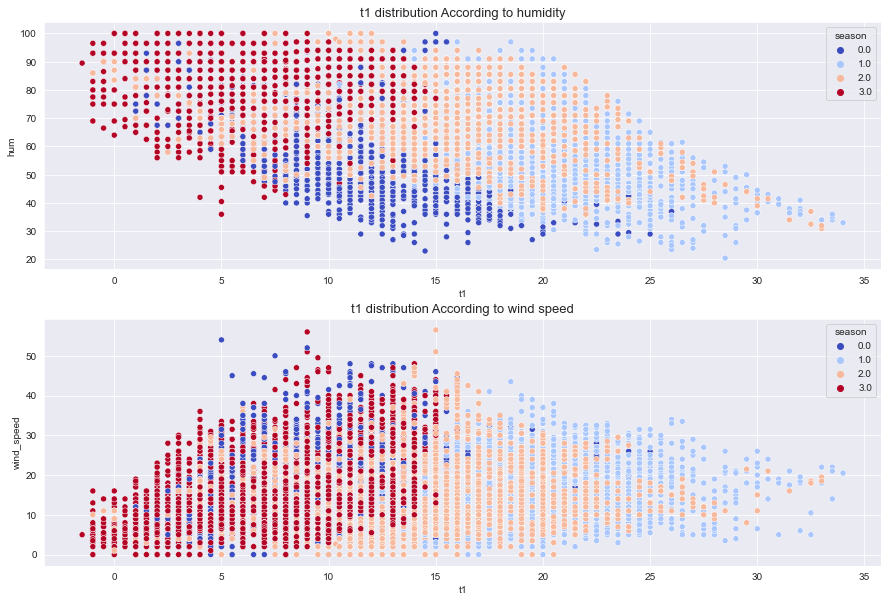

In [162]:
# seaborn scatterplot
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.scatterplot(data = df, x = "t1", y = "hum", palette = "coolwarm", hue = "season", ax = ax[0]).set_title("t1 distribution According to humidity", fontsize = 13)
sns.scatterplot(data = df, x = "t1", y = "wind_speed", palette = "coolwarm", hue = "season", ax = ax[1]).set_title("t1 distribution According to wind speed", fontsize = 13);

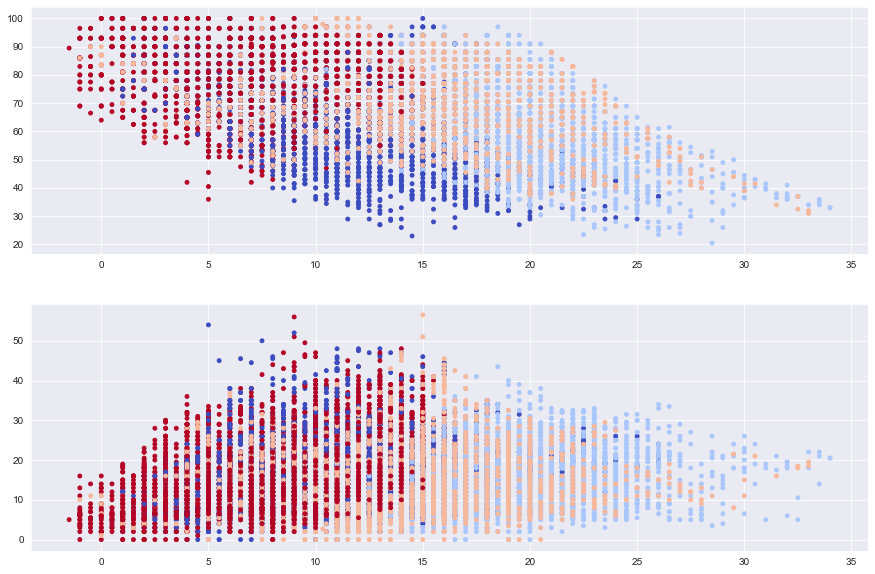

In [167]:
# matplotlib scatterplot
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.scatter(data=df, x="t1", y="hum", c="season", cmap="coolwarm", s = 15)
plt.subplot(2,1,2)
plt.scatter(data=df, x="t1", y="wind_speed", c="season", cmap="coolwarm", s = 15);

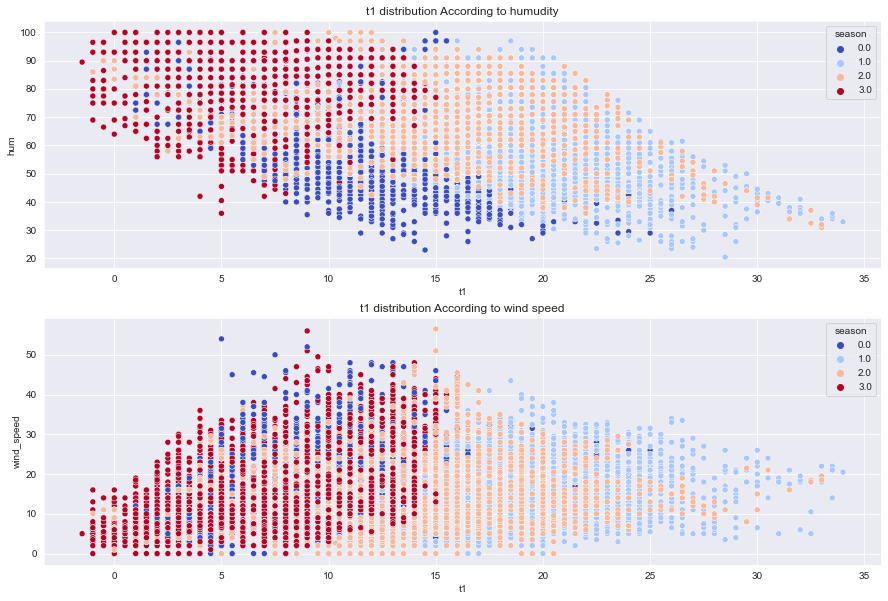

In [88]:
# (other method)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.title("t1 distribution According to humudity")
sns.scatterplot(x="t1",y="hum",data=df, hue='season',palette="coolwarm")
plt.subplot(212)
plt.title("t1 distribution According to wind speed")
sns.scatterplot(x="t1",y="wind_speed",data=df, hue='season',palette="coolwarm");